In [3]:
import numpy as np
import pandas as pd
from scipy import stats

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [4]:
stats.binom_test(67, n=100, p=0.75, alternative='two-sided')

0.08222258891386608

---

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [5]:
data = pd.read_csv('pines.txt', sep='\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


[[18. 14. 12.  8.  7.]
 [26. 12. 24. 19.  8.]
 [29. 22. 15. 31. 37.]
 [25. 34. 50. 50. 27.]
 [20. 25. 37.  7. 27.]]
23.36


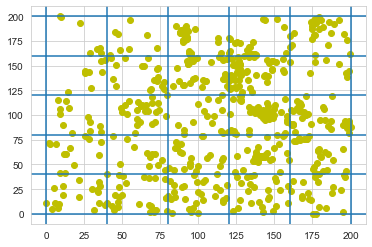

In [6]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('whitegrid')

xbins = np.linspace(0, 200, 6)
ybins = np.linspace(0, 200, 6)

ret = stats.binned_statistic_2d(x=data['we'], y=data['sn'], values=data['we'],
                                statistic='count', bins=[xbins, ybins])

plt.plot(data['we'], data['sn'], 'o', c='y')
[plt.axvline(i) for i in xbins]
[plt.axhline(i) for i in ybins]
# Количество сосен в каждом квадрате
print(ret.statistic)
# Среднее ожидаемое количество сосен в каждом квадрате
print(np.mean(ret.statistic))

---

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [7]:
stats.chisquare(ret.statistic.flatten(), ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)